In [2]:
#Importamos librerias necesarias
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

#Conexion con la base de datos 
conn = sqlite3.connect('travel.sqlite')

In [3]:
E2 = "SELECT  flights.aircraft_code AS Avion, SUM(CASE WHEN ticket_flights.fare_conditions = 'Economy' THEN 1 ELSE 0 END) AS TICKETS_ECONOMY, SUM(CASE WHEN ticket_flights.fare_conditions = 'Comfort' THEN 1 ELSE 0 END) AS TICKETS_COMFROT, SUM(CASE WHEN ticket_flights.fare_conditions = 'Business' THEN 1 ELSE 0 END) AS TICKETS_BUSINESS, count (ticket_flights.fare_conditions) AS TOTAL_TICKETS FROM flights INNER JOIN ticket_flights ON ticket_flights.flight_id = flights.flight_id WHERE status IN ('Arrived') AND aircraft_code IN ('CR2','733','CN1') GROUP by flights.aircraft_code ORDER BY TICKETS_ECONOMY DESC;"

Df_E2 = pd.read_sql_query(sql = E2, con = conn)
Df_E2

,Avion,TICKETS_ECONOMY,TICKETS_COMFROT,TICKETS_BUSINESS,TOTAL_TICKETS
0,CR2,83311,0,0,83311
1,733,42988,0,4365,47353
2,CN1,8095,0,0,8095


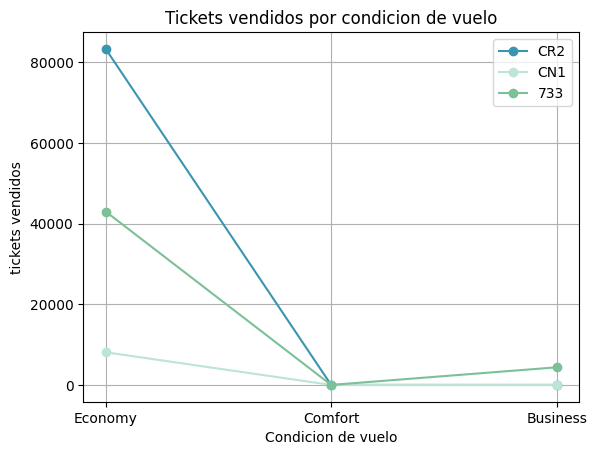

In [4]:
import matplotlib.pyplot as plt

# Datos de ejemplo
CLASES = ['Economy','Comfort', 'Business']
AVION_CR2 = [83311, 0, 0]
AVION_CN1 = [8095, 0, 0]
AVION_733 = [42988, 0, 4365]

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear la gráfica
plt.plot(CLASES, AVION_CR2, label="CR2", marker='o', linestyle='-', color='#3A95B1')
plt.plot(CLASES, AVION_CN1, label="CN1", marker='o', linestyle='-', color= '#BCE4D8')
plt.plot(CLASES, AVION_733, label="733", marker='o', linestyle='-', color= '#7CC098')


# Personalizar la gráfica
plt.xlabel("Condicion de vuelo")
plt.ylabel("tickets vendidos")
plt.title("Tickets vendidos por condicion de vuelo")
ax.grid(True)  # Agregar líneas de cuadrícula
ax.legend(loc='upper right')  # Mover la leyenda a la esquina superior derecha
plt.legend()


# Mostrar la gráfica
plt.show()

In [10]:
nueva = "SELECT aircraft_code AS 'Avión', count (status) AS 'Frecuencia_de_vuelos_realizados' FROM flights WHERE status IN ('Arrived') AND aircraft_code IN ('CR2','SU9','CN1') AND arrival_airport IN ('DME') GROUP BY aircraft_code ORDER BY count (status) DESC;"

dfnueva = pd.read_sql_query(sql = nueva, con = conn)
dfnueva

,Avión,Frecuencia_de_vuelos_realizados
0,SU9,498
1,CR2,417
2,CN1,210


ValueError: 'explode' must be of length 'x'

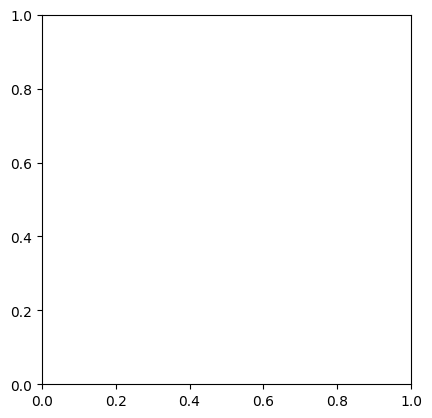

In [17]:
aviones = ['CN1', 'CR2', 'SU9']
frecuencia = ['210', '417', '498']
explotar = (0.1, 0.05, 0.12, 0.1)
colors = ['#3A95B1', '#7BBFC9', '#BCE4D8']

def autopct_fun(frecuencia):
    gen = iter(frecuencia)
    return lambda pct: f"{pct:1.0f}% ({next(gen)})"

plt.pie(frecuencia, labels=aviones, explode=explotar, colors=colors,
        autopct='%1.0f%%',
        shadow=True, startangle=20,
        pctdistance=0.6, radius=0.7, labeldistance=1.15)

plt.show()

In [13]:
nueva2 = "SELECT  flights.aircraft_code AS Avion, SUM(CASE WHEN ticket_flights.fare_conditions = 'Economy' THEN 1 ELSE 0 END) AS TICKETS_ECONOMY, SUM(CASE WHEN ticket_flights.fare_conditions = 'Comfort' THEN 1 ELSE 0 END) AS TICKETS_COMFROT, SUM(CASE WHEN ticket_flights.fare_conditions = 'Business' THEN 1 ELSE 0 END) AS TICKETS_BUSINESS, count (ticket_flights.fare_conditions) AS TOTAL_TICKETS FROM flights INNER JOIN ticket_flights ON ticket_flights.flight_id = flights.flight_id WHERE status IN ('Arrived') AND aircraft_code IN ('CR2','SU9','CN1') AND flights.arrival_airport IN ('DME') GROUP by flights.aircraft_code ORDER BY TICKETS_ECONOMY DESC;"
dfnueva2 = pd.read_sql_query(sql = nueva2, con = conn)
dfnueva2

,Avion,TICKETS_ECONOMY,TICKETS_COMFROT,TICKETS_BUSINESS,TOTAL_TICKETS
0,SU9,20880,0,2975,23855
1,CR2,8939,0,0,8939
2,CN1,601,0,0,601


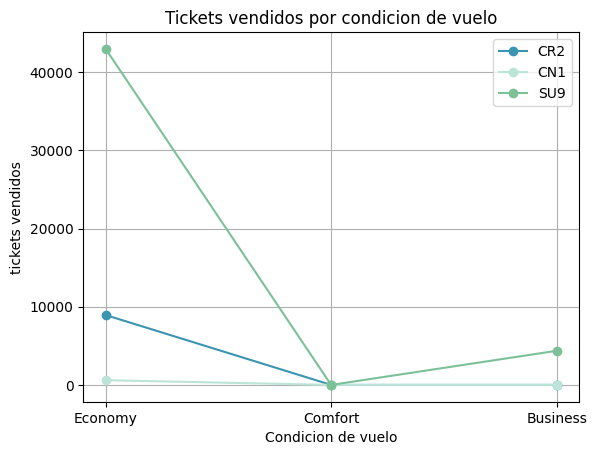

In [15]:
CLASES = ['Economy','Comfort', 'Business']
AVION_CR2 = [8939, 0, 0]
AVION_CN1 = [601, 0, 0]
AVION_SU9 = [20880, 0, 2975]

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear la gráfica
plt.plot(CLASES, AVION_CR2, label="CR2", marker='o', linestyle='-', color='#3A95B1')
plt.plot(CLASES, AVION_CN1, label="CN1", marker='o', linestyle='-', color= '#BCE4D8')
plt.plot(CLASES, AVION_733, label="SU9", marker='o', linestyle='-', color= '#7CC098')


# Personalizar la gráfica
plt.xlabel("Condicion de vuelo")
plt.ylabel("tickets vendidos")
plt.title("Tickets vendidos por condicion de vuelo")
ax.grid(True)  # Agregar líneas de cuadrícula
ax.legend(loc='upper right')  # Mover la leyenda a la esquina superior derecha
plt.legend()